## Limpieza Proyecto Repositiorios de datos

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
sns.set_theme()

In [24]:
df = pd.read_csv('/Users/diegomaldonadocastro/Desktop/Semestre 6/archive/RAW_recipes.csv')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [26]:
df['nutrition'][0]

'[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]'

Nutrition information (calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat

In [27]:
df['nutrition'] = df['nutrition'].str.replace(r'[\[\]]', '', regex=True)

In [28]:
split_nutrition = df['nutrition'].str.split(',', expand=True)

df[['calories', 'total_fat_pdv', 'sugar_pdv', 'sodium_pdv', 'protein_pdv', 'saturated_fat_pdv', 'carbohydrates_pdv']] = split_nutrition

df[['calories', 'total_fat_pdv', 'sugar_pdv', 'sodium_pdv', 'protein_pdv', 'saturated_fat_pdv', 'carbohydrates_pdv']] = df[
    ['calories', 'total_fat_pdv', 'sugar_pdv', 'sodium_pdv', 'protein_pdv', 'saturated_fat_pdv', 'carbohydrates_pdv']
].apply(pd.to_numeric, errors='coerce')

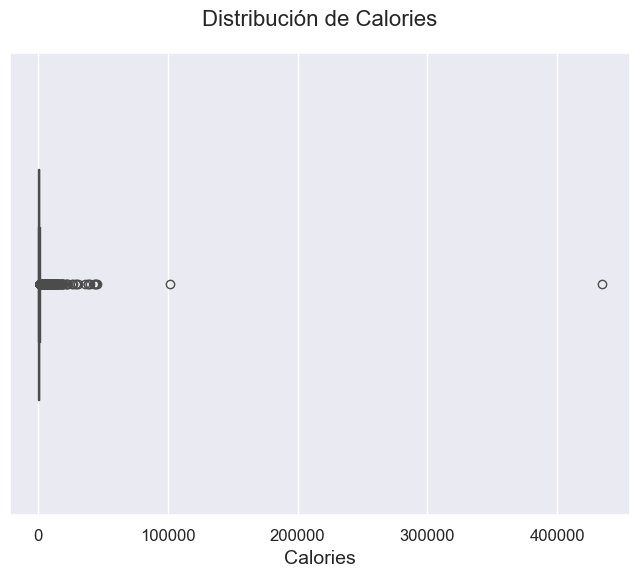

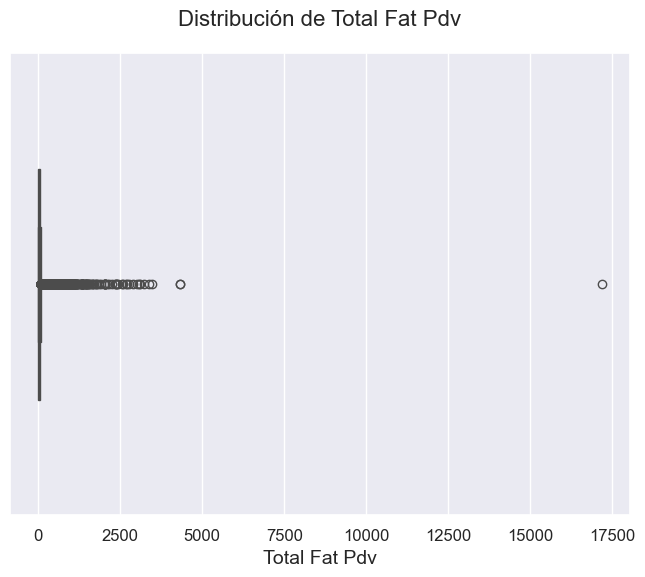

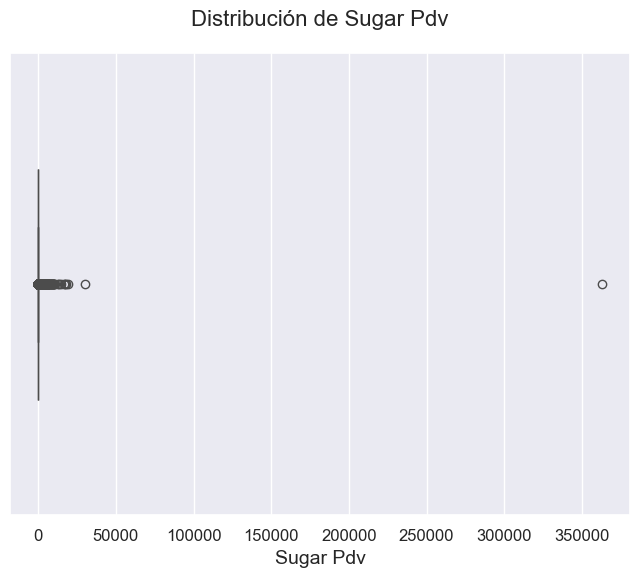

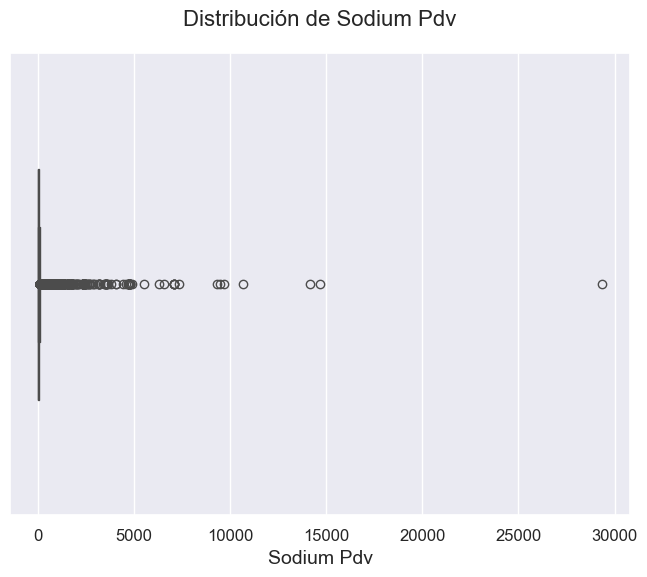

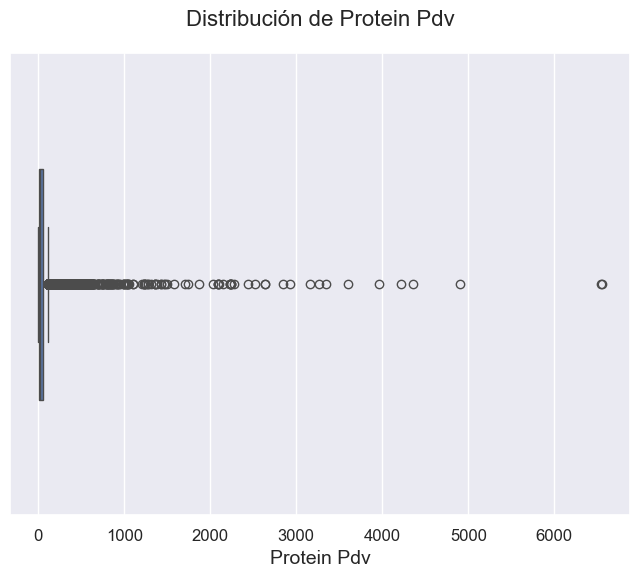

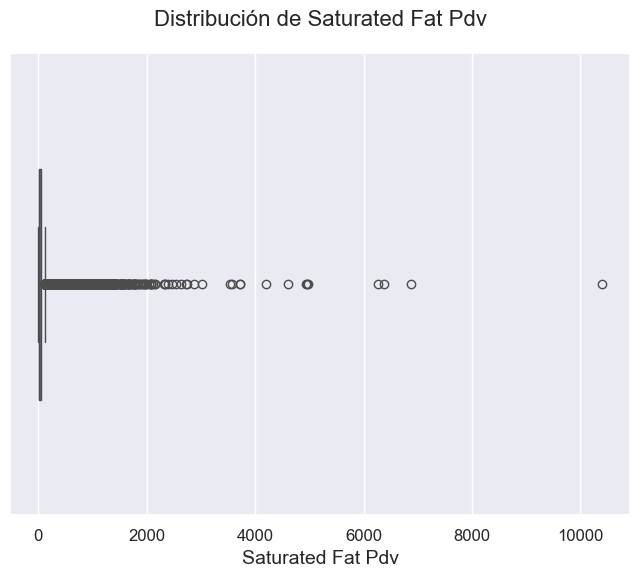

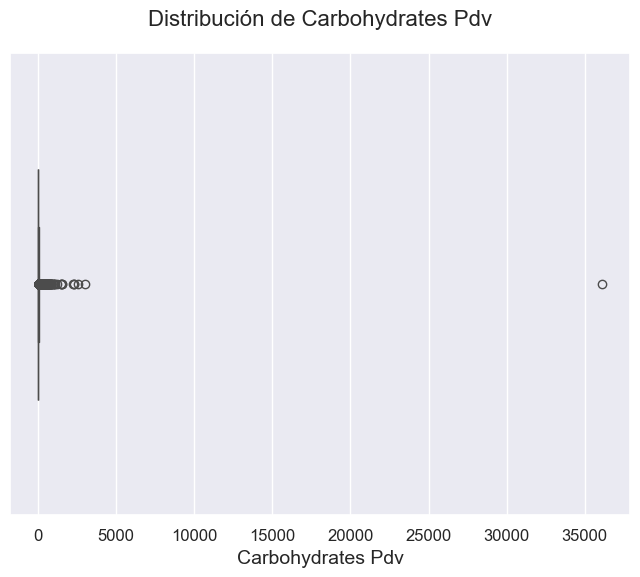

In [29]:
nutrition_columns = [
    'calories', 'total_fat_pdv', 'sugar_pdv', 'sodium_pdv',
    'protein_pdv', 'saturated_fat_pdv', 'carbohydrates_pdv'
]

for column in nutrition_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column], width=0.5)
    plt.title(f"Distribución de {column.replace('_', ' ').title()}", fontsize=16, pad=20)
    plt.xlabel(f"{column.replace('_', ' ').title()}", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [30]:
df = df.drop(df[df['calories'] > 3000].index)
df = df.drop(df[df['total_fat_pdv'] > 110].index)
df = df.drop(df[df['sugar_pdv'] > 110].index)
df = df.drop(df[df['sodium_pdv'] > 110].index)
df = df.drop(df[df['protein_pdv'] > 110].index)
df = df.drop(df[df['saturated_fat_pdv'] > 110].index)
df = df.drop(df[df['carbohydrates_pdv'] > 110].index)

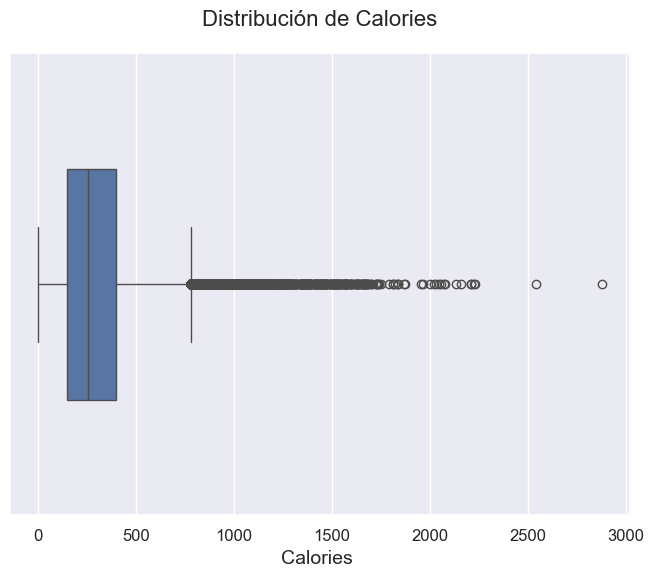

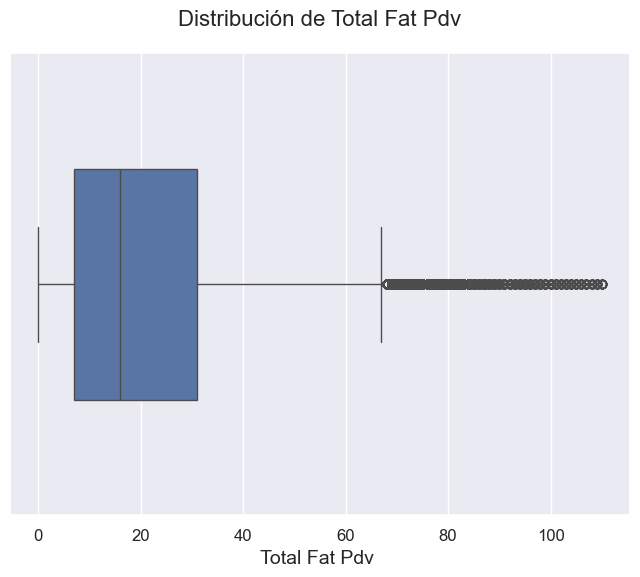

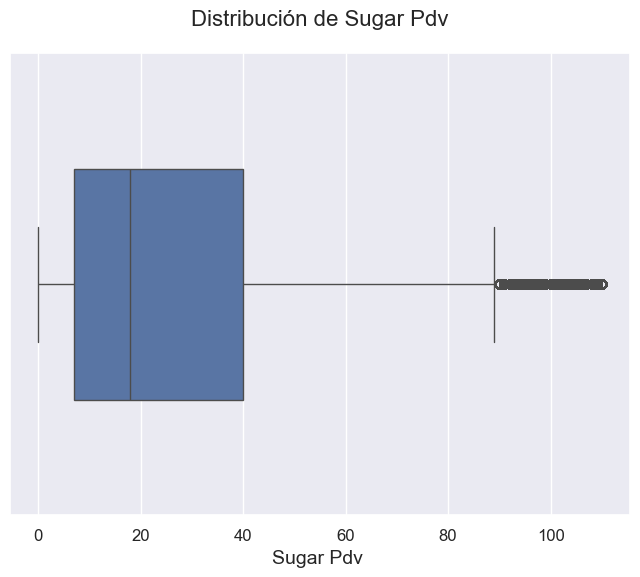

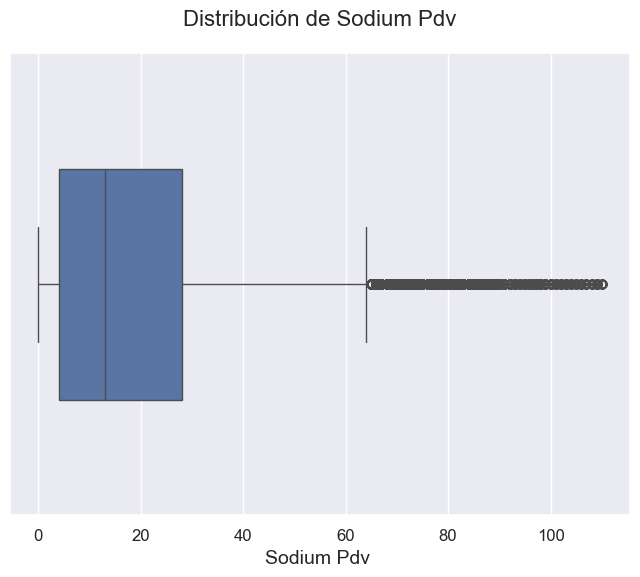

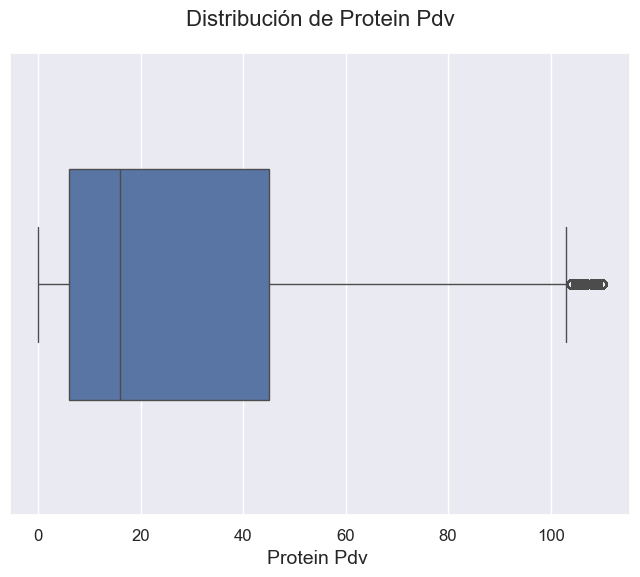

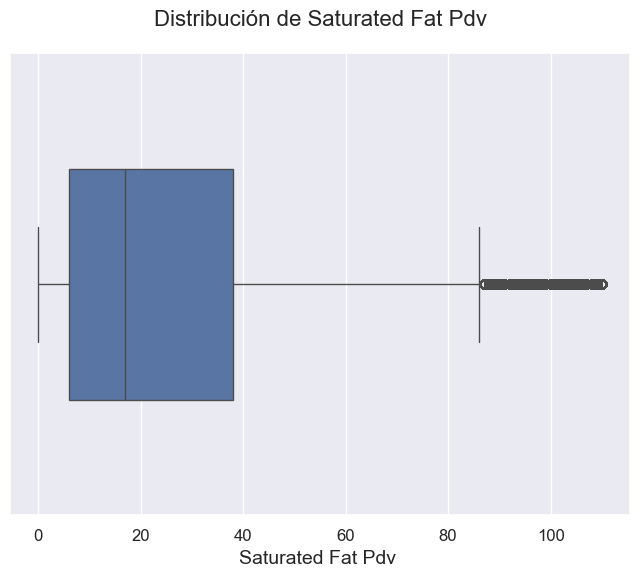

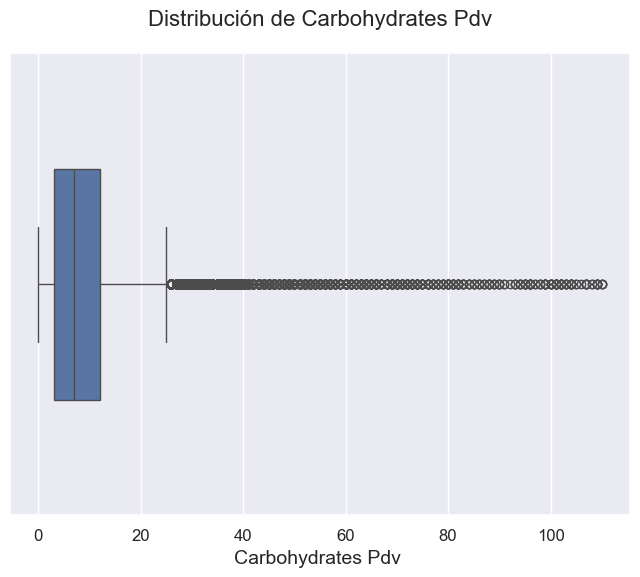

In [31]:

for column in nutrition_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column], width=0.5)
    plt.title(f"Distribución de {column.replace('_', ' ').title()}", fontsize=16, pad=20)
    plt.xlabel(f"{column.replace('_', ' ').title()} ", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [10]:
df.drop(['nutrition','submitted','contributor_id','id'],axis=1)

,name,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat_pdv,sugar_pdv,sodium_pdv,protein_pdv,saturated_fat_pdv,carbohydrates_pdv
0,arriba baked winter squash mexican style,55,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,30,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,130,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,45,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
5,apple a day milk shake,0,"['15-minutes-or-less', 'time-to-make', 'course...",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4,160.2,10.0,55.0,3.0,9.0,20.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,60,"['ham', '60-minutes-or-less', 'time-to-make', ...",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0
231633,zydeco spice mix,5,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0
231634,zydeco ya ya deviled eggs,40,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0
231635,cookies by design cookies on a stick,29,"['30-minutes-or-less', 'time-to-make', 'course...",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0


In [11]:
df.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,calories,total_fat_pdv,sugar_pdv,sodium_pdv,protein_pdv,saturated_fat_pdv,carbohydrates_pdv
count,176289.000000,1.762890e+05,1.762890e+05,176289.000000,176289.000000,176289.000000,176289.000000,176289.000000,176289.000000,176289.000000,176289.000000,176289.000000
mean,225910.739502,1.227791e+04,5.331578e+06,9.448224,9.005122,292.266538,21.331575,27.682340,19.236566,27.048642,25.427293,8.657829
std,140879.904012,5.114666e+06,9.762697e+07,5.571705,3.666359,196.306492,18.733973,26.840095,19.913788,26.431000,25.095537,8.165856
min,45.000000,0.000000e+00,2.700000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104227.000000,2.000000e+01,5.810400e+04,6.000000,6.000000,145.100000,7.000000,7.000000,4.000000,6.000000,6.000000,3.000000
50%,213546.000000,3.500000e+01,1.838720e+05,8.000000,9.000000,254.100000,16.000000,18.000000,13.000000,16.000000,17.000000,7.000000
75%,337893.000000,6.000000e+01,4.138800e+05,12.000000,11.000000,398.700000,31.000000,40.000000,28.000000,45.000000,38.000000,12.000000
max,537716.000000,2.147484e+09,2.002285e+09,108.000000,43.000000,2878.800000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import ast

df = df.head(23000)

print(f"Number of rows after dropping: {len(df)}")
print(f"Minimum calories: {df['calories'].min()}")
print(f"Maximum calories: {df['calories'].max()}")

df['ingredients'] = df['ingredients'].apply(ast.literal_eval)
df['tags'] = df['tags'].apply(ast.literal_eval)

df['ingredients_joined'] = df['ingredients'].apply(lambda x: ' '.join(x))
df['tags_joined'] = df['tags'].apply(lambda x: ' '.join(x))

vectorizer_ingredients = CountVectorizer(
    binary=True,  
    lowercase=False,
    tokenizer=lambda x: x.split(),
    token_pattern=None,
)

binary_matrix_ingredients = vectorizer_ingredients.fit_transform(df['ingredients_joined'])

binary_df_ingredients = pd.DataFrame(
    binary_matrix_ingredients.toarray(),
    columns=[f"{col} (ing)" for col in vectorizer_ingredients.get_feature_names_out()],
    index=df.index  # Ensure the index matches the original DataFrame
)

vectorizer_tags = CountVectorizer(
    binary=True,  
    lowercase=False,
    tokenizer=lambda x: x.split(),
    token_pattern=None,
    min_df=5
)

binary_matrix_tags = vectorizer_tags.fit_transform(df['tags_joined'])

binary_df_tags = pd.DataFrame(
    binary_matrix_tags.toarray(),
    columns=[f"{col} (tag)" for col in vectorizer_tags.get_feature_names_out()],
    index=df.index
)

df = pd.concat([df, binary_df_ingredients, binary_df_tags], axis=1)

print("Number of NaN values in the final DataFrame:", df.isnull().sum().sum())

df

Number of rows after dropping: 23000
Minimum calories: 0.0
Maximum calories: 2542.1
Number of NaN values in the final DataFrame: 518


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,welsh (tag),white-rice (tag),whitefish (tag),whole-chicken (tag),wild-game (tag),wings (tag),winter (tag),yams-sweet-potatoes (tag),yeast (tag),zucchini (tag)
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,0,0,0,0,0,0,1,0,0,0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...","173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,0,0,0,0,0,0,0,0,0,0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...","269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,...,0,0,0,0,0,0,0,0,0,0
3,alouette potatoes,59389,45,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...","368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...",...,0,0,0,0,0,0,0,0,0,0
5,apple a day milk shake,5289,0,1533,1999-12-06,"[15-minutes-or-less, time-to-make, course, mai...","160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0",4,"['combine ingredients in blender', 'cover and ...",NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30997,buckwheat and cottage cheese casserole,256266,75,382071,2007-09-29,"[time-to-make, course, main-ingredient, cuisin...","145.1, 12.0, 2.0, 20.0, 18.0, 23.0, 3.0",18,['set a rack in the center and preheat the ove...,"from: ""whole grains every day, every way"" by l...",...,0,0,0,0,0,0,1,0,0,0
30998,buckwheat and oat pancakes,363679,25,95743,2009-03-30,"[30-minutes-or-less, time-to-make, course, mai...","128.6, 11.0, 7.0, 10.0, 7.0, 4.0, 4.0",8,"['mix dry ingredients in a large bowl', 'beat ...",i've been working on this recipe for a few mon...,...,0,0,0,0,0,0,1,0,0,0
30999,buckwheat and yam tortillas with stir fry,93219,75,4470,2004-06-11,"[time-to-make, course, main-ingredient, prepar...","367.5, 13.0, 58.0, 44.0, 23.0, 6.0, 21.0",27,"['tortillas:', 'pour the buckwheat& white flou...",these tortillas are delightfully different & t...,...,0,0,0,0,0,0,0,0,0,0
31000,buckwheat apple rolls,109608,240,177285,2005-01-26,"[time-to-make, course, main-ingredient, prepar...","152.8, 7.0, 21.0, 3.0, 8.0, 12.0, 8.0",24,"['dough:', 'pour warm water into bowl', 'add y...",slightly bland with a subtle kick. top with cr...,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df = df.drop(['tags','nutrition','submitted','contributor_id','id'],axis=1)

In [14]:
for i in df.columns:
    missing_ratio = 100 * (1 - df[i].count() / len(df))
    if df[i].count() < 23000:
        print(f"{i}: {df[i].count()} valores no nulos ({missing_ratio:.2f}% datos faltantes)")

description: 22482 valores no nulos (2.25% datos faltantes)
